In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

filename = '/gdrive/My Drive/ML/data/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'Outcome']

# 1. Number of times pregnant(임신회수)
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test: 글루코즈
# 3. Diastolic blood pressure (mm Hg) : 혈압
# 4. Triceps skin fold thickness (mm) : 팔근육량 
# 5. 2-Hour serum insulin (mu U/ml) : 인슐린 
# 6. Body mass index (weight in kg/(height in m)^2): BMI
# 7. Diabetes pedigree function : 가족력
# 8. Age (years) : 나이
# 9. Class variable (0 or 1)

diabetes_data = pd.read_csv(filename, names=names)
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(5)

0    500
1    268
Name: Outcome, dtype: int64


,preg,plas,pres,skin,test,mass,pedi,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


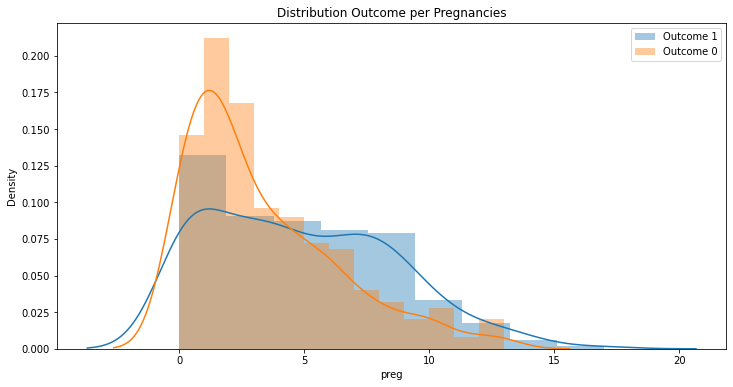

In [6]:
import  matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per Pregnancies")
sns.distplot(diabetes_data[diabetes_data['Outcome']==1]['preg'], label='Outcome 1')
sns.distplot(diabetes_data[diabetes_data['Outcome']==0]['preg'], label='Outcome 0')
plt.legend()

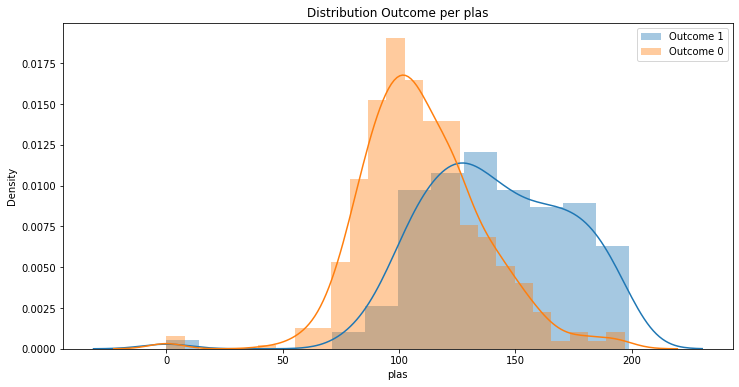

In [7]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per plas")
sns.distplot(diabetes_data[diabetes_data['Outcome']==1]['plas'], label='Outcome 1')
sns.distplot(diabetes_data[diabetes_data['Outcome']==0]['plas'], label='Outcome 0')
plt.legend()

In [8]:
zero_features = ['pres','skin','test', 'mass']
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)
# diabetes_data['test'] = np.log(diabetes_data['test'])
# diabetes_data['pedi'] = np.log(diabetes_data['pedi'])

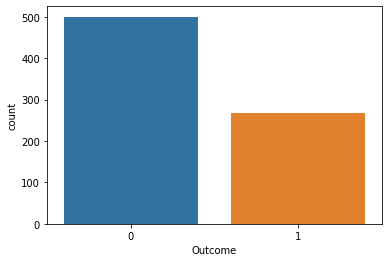

In [10]:
sns.countplot('Outcome',data=diabetes_data)

In [12]:
def model_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))




In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [14]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

oversample = RandomOverSampler(sampling_strategy='minority')    
X_over, y_over = oversample.fit_resample(X,y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

model_eval(y_test, pred)

오차행렬
[[76 15]
 [38 71]]
정확도: 0.7350, 정밀도: 0.8256, 재현율: 0.6514, F1: 0.7282, AUC:0.7433


In [17]:
pred_proba

array([0.96215432, 0.16173315, 0.50334292, 0.93543842, 0.89244075,
       0.07805804, 0.56960703, 0.41080876, 0.39522133, 0.05630229,
       0.62557592, 0.80420171, 0.32137814, 0.54600515, 0.72292355,
       0.14975481, 0.71144399, 0.02955468, 0.21609085, 0.54302306,
       0.7434743 , 0.60890508, 0.67325047, 0.11586343, 0.74588335,
       0.11273165, 0.39549522, 0.17508119, 0.00680918, 0.34554716,
       0.3219228 , 0.04044697, 0.07567471, 0.15449571, 0.45257282,
       0.61445272, 0.78449917, 0.35394404, 0.51880276, 0.23734378,
       0.75393591, 0.88334591, 0.13326435, 0.75389537, 0.80198072,
       0.70252253, 0.71619681, 0.18118807, 0.39857929, 0.15832064,
       0.52730335, 0.31687029, 0.39073516, 0.14305619, 0.33812838,
       0.09913263, 0.28508332, 0.18480622, 0.31462964, 0.91148275,
       0.16517101, 0.90680173, 0.49883979, 0.08633563, 0.69166408,
       0.58485801, 0.25621359, 0.20532087, 0.85964469, 0.86380127,
       0.31071992, 0.9802401 , 0.40109712, 0.47406963, 0.34289

In [18]:
def dec_by_prob(y_test, pred_proba, criteria):
    import numpy as np
    pred = np.where(pred_proba > criteria, 1, 0)
    return pred

pred = dec_by_prob(y_test, pred_proba, 0.4)
model_eval(y_test, pred)

오차행렬
[[68 23]
 [28 81]]
정확도: 0.7450, 정밀도: 0.7788, 재현율: 0.7431, F1: 0.7606, AUC:0.7452


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8114ce5210>,
      dtype=object)

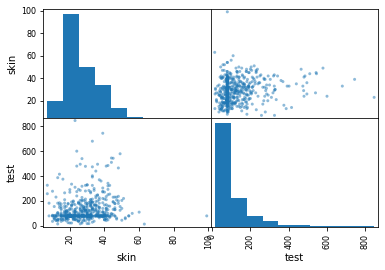

In [23]:
pd.plotting.scatter_matrix(diabetes_data[['skin', 'test']])

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [25]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
pred = model.predict(X_test)
model_eval(y_test, pred)

오차행렬
[[ 70  21]
 [  9 100]]
정확도: 0.8500, 정밀도: 0.8264, 재현율: 0.9174, F1: 0.8696, AUC:0.8433


In [26]:
n_trees = 100
model = RandomForestClassifier(n_estimators=n_trees)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model_eval(y_test, pred)

오차행렬
[[81 10]
 [10 99]]
정확도: 0.9000, 정밀도: 0.9083, 재현율: 0.9083, F1: 0.9083, AUC:0.8992


In [27]:
model = AdaBoostClassifier(n_estimators=n_trees)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model_eval(y_test, pred)

오차행렬
[[78 13]
 [25 84]]
정확도: 0.8100, 정밀도: 0.8660, 재현율: 0.7706, F1: 0.8155, AUC:0.8139


In [28]:
model = GradientBoostingClassifier(n_estimators=n_trees)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model_eval(y_test, pred)

오차행렬
[[77 14]
 [17 92]]
정확도: 0.8450, 정밀도: 0.8679, 재현율: 0.8440, F1: 0.8558, AUC:0.8451


In [29]:
model = XGBClassifier(n_estimators=n_trees)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model_eval(y_test, pred)

오차행렬
[[75 16]
 [16 93]]
정확도: 0.8400, 정밀도: 0.8532, 재현율: 0.8532, F1: 0.8532, AUC:0.8387


In [36]:
model = LGBMClassifier(n_estimators=n_trees)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model_eval(y_test, pred)

오차행렬
[[77 14]
 [11 98]]
정확도: 0.8750, 정밀도: 0.8750, 재현율: 0.8991, F1: 0.8869, AUC:0.8726


In [37]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [68]:
parms = {'boosting_type': 'gbdt',
 'colsample_bytree': 1,
 'learning_rate': 0.03,
 'n_estimators': 300,
 'num_leaves': 31,
 'objective': 'binary',
 'reg_alpha': 0,
 'reg_lambda': 0,
 'subsample': 0.7}

In [69]:
model = LGBMClassifier(**parms)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1] 
model_eval(y_test, pred)

오차행렬
[[78 13]
 [11 98]]
정확도: 0.8800, 정밀도: 0.8829, 재현율: 0.8991, F1: 0.8909, AUC:0.8781


In [70]:
from sklearn.model_selection import GridSearchCV
clf = LGBMClassifier()
param_grid = {
    'learning_rate': [0.005, 0.01, 0.02, 0.03, 0.05, 0.1],
    'n_estimators': [100,300, 500],
    'num_leaves': [31, 40, 50], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'colsample_bytree' : [0.8, 1],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [0, 1,1.2],
    'reg_lambda' : [0, 1,1.2],
    }

gsearch = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=2)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=...
             iid='deprecated', n_jobs=2,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.005, 0.01, 0.02, 0.03, 0.05, 0.1],
                         'n_estimator

In [71]:
gsearch.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 1,
 'learning_rate': 0.03,
 'n_estimators': 500,
 'num_leaves': 31,
 'objective': 'binary',
 'reg_alpha': 1,
 'reg_lambda': 0,
 'subsample': 0.7}

In [72]:
model = gsearch.best_estimator_  # 최적의 파라미터로 모델 생성
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1] 
model_eval(y_test, pred)

오차행렬
[[ 76  15]
 [  9 100]]
정확도: 0.8800, 정밀도: 0.8696, 재현율: 0.9174, F1: 0.8929, AUC:0.8763
